## Table of Contents
### 0. TensorBoard
### 1. Read  in data 
### 2. Setup TensorBoard
### 3. Write to  TensorBoard
### 4. Inspect model architecture with TensorBoard
### 5. Use Tensorboard to create interactive  visualizations


----

## 0. TensorBoard
실시간으로 학습 과정을 확인 가능한, 다양한 시각화 기능을 제공하는 딥러닝 tool (both in tensorflow and pytorch)



## 1. Read in Data & Model

### Data
1. Define ``transform``
2. Import ``dataset`` using transform
3. Define ``dataloader`` using dataset
4. Define **classes** of the data

### Model
1. Define model class by ``nn.Module``
2. Define loss functoin and optimizer

#### Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform= transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))])

In [4]:
trainset= torchvision.datasets.FashionMNIST('./data',
                                           download= True,
                                           train= True,
                                           transform= transform)

testset= torchvision.datasets.FashionMNIST('./data',
                                           download= True,
                                           train= False,
                                           transform= transform)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [14]:
trainloader= torch.utils.data.DataLoader(trainset, batch_size= 4,
                                        shuffle= True, num_workers= 0)
testloader= torch.utils.data.DataLoader(testset, batch_size= 4,
                                       shuffle=False, num_workers= 0)

In [5]:
classes= ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [6]:
def matplotlib_imshow(img, one_channel= False):
    if one_channel:
        img= img.mean(dim= 0)
    img= img/2 + 0.5
    npimg= img.numpy()
    if one_channel: 
        plt.imshow(npimg, cmap= "Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

#### Model 

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1= nn.Conv2d(1, 6, 5)
        self.pool= nn.MaxPool2d(2, 2)
        self.conv2= nn.Conv2d(6, 16, 5)
        self.fc1= nn.Linear(16*4*4, 120)
        self.fc2= nn.Linear(120, 84)
        self.fc3= nn.Linear(84, 10)
        
    def forward(self, x):
        x= self.pool(F.relu(self.conv1(x)))
        x= self.pool(F.relu(self.conv2(x)))
        x= x.view(-1,  16*4*4)
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= self.fc3(x)
        
        return x
    
net= Net()

In [31]:
criterion= nn.CrossEntropyLoss()
optimizer= optim.SGD(net.parameters(), lr= 0.001,  momentum= 0.9)

---
## 2. TensorBoard Set-up
To set up a TensorBoard, we need object ``SummaryWriter`` which writes information into TensorBoard

In [10]:
from torch.utils.tensorboard import SummaryWriter

writer= SummaryWriter('runs/fashion_mnist_experiment_0')

code above creates a 'runs/fashion_mnist_experiment_0' folder

---
## 3. Writing to TensorBoard
writing image to TensorBoard using ``make_grid``

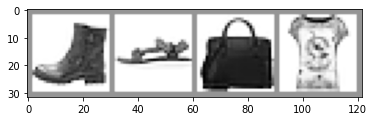

In [17]:
dataiter= iter(trainloader)
images, labels= dataiter.next()

img_grid= torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

writer.add_image('four_fashion_mnist_images', img_grid)

Let's check this in tensorboard

In [20]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


---
## 4. Inspect the model using TensorBoard

We can visulaize the model structure by form of graph in TensorBoard (in "Graphs" tab)

In [21]:
writer.add_graph(net, images)
writer.close()

In [22]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


---
## 5. Use Tensorboard to create interactive  visualizations

### 5-1) Projector
Data를 lower dimension에 나타낼 수 있다. 

In [25]:
# 오류를 해결하기 위한 코드
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

In [26]:
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)
    
    perm= torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

images, labels= select_n_random(trainset.data, trainset.targets)

class_labels= [classes[lab] for lab in labels]

features= images.view(-1, 28*28)
writer.add_embedding(features, 
                    metadata=class_labels,
                    label_img= images.unsqueeze(1))

writer.close()

In [27]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


---
### 5-2) Tracking Model with TensorBoard
Loss를 graph로 관찰함으로서, 조금 더 정확한 모델 분석을 진행 할 수 있다.

In [28]:
def images_to_probs(net, images):
    
    output= net(images)
    _, preds_tensor= torch.max(output, 1)
    preds= np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]

In [29]:
def plot_classes_preds(net, images, labels):
    preds, probs= images_to_probs(net, images)
    
    fig= plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax= fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1: .1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color= ("green" if preds[idx] == labels[idx].item() else "red"))
        
    return fig

In [32]:
running_loss= 0.0
for epoch in range(1):
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels= data
        optimizer.zero_grad()
        
        outputs= net(inputs)
        loss= criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss+= loss.item()
        if i % 1000 == 999:
            writer.add_scalar('training loss',
                             running_loss / 1000,
                             epoch * len(trainloader) + i)
            
            writer.add_figure('predictions vs actuals',
                             plot_classes_preds(net, inputs, labels),
                             global_step= epoch * len(trainloader) + i)
            
            running_loss= 0.0
            
print('Finished Training')

Finished Training


In [33]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


### 5-3) Assessing trained models with TensorBoard

we assess a model not only with accuracy. We can use lots of metrics, like PR-curve below

In [34]:
class_probs= []
class_preds= []

with torch.no_grad():
    for data in testloader:
        images, labels= data
        output= net(images)
        class_probs_batch= [F.softmax(el, dim=0) for el in output]
        _, class_preds_batch= torch.max(output,  1)
        
        class_probs.append(class_probs_batch)
        class_preds.append(class_preds_batch)
        
test_probs= torch.cat([torch.stack(batch) for batch in class_probs])
test_preds= torch.cat(class_preds)

def add_pr_curve_tensorboard(class_index, test_probs, test_preds, global_step= 0):
    tensorboard_preds= (test_preds == class_index)
    tensorboard_probs= test_probs[:, class_index]
    
    writer.add_pr_curve(classes[class_index],
                        tensorboard_preds,
                        tensorboard_probs,
                        global_step= global_step)
    
    writer.close()
    
for i in range(len(classes)):
    add_pr_curve_tensorboard(i, test_probs,  test_preds)

In [35]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C
